In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/maengjuseog/Desktop/3-2/DeepLearningClass/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [4]:
X=df.drop(['Rings','Sex'],axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [6]:
Y=df['Rings']
Y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [7]:
Y = pd.get_dummies(y).values

In [8]:
X = X.values

In [9]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(28,activation='softmax'))

model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386 (1.51 KB)

 Trainable params: 386 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 2.0846 - val_accuracy: 0.2691 - val_loss: 2.1086
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.2783 - loss: 2.0829 - val_accuracy: 0.2691 - val_loss: 2.1013
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.2817 - loss: 2.0859 - val_accuracy: 0.2727 - val_loss: 2.0958
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.2798 - loss: 2.0848 - val_accuracy: 0.2799 - val_loss: 2.0895
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.2852 - loss: 2.0500 - val_accuracy: 0.2775 - val_loss: 2.0891
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.2707 - loss: 2.0482 - val_accuracy: 0.2823 - val_loss: 2.0838
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.2708 - loss: 2.0394 - val_accuracy: 0.2907 - val_loss: 2.0738
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.2712 - loss: 2.0600 - va

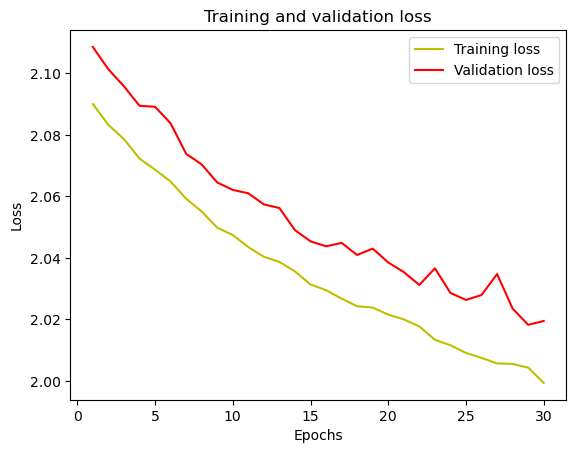

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

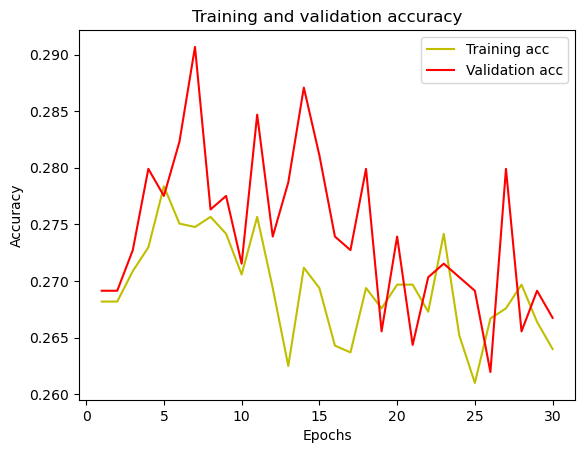

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.16      0.27      0.20        11
           4       0.41      0.36      0.39        33
           5       0.33      0.38      0.36        47
           6       0.40      0.43      0.41        98
           7       0.35      0.42      0.38       113
           8       0.26      0.46      0.33       127
           9       0.18      0.23      0.20       107
          10       0.13      0.18      0.15        95
          11       0.00      0.00      0.00        66
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         8
          19       0.00    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
